[Reference](https://medium.com/@alexroz/6-python-libraries-to-make-beautiful-maps-9fb9edb28b27)

# 1. Cartopy

In [1]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

lats = np.load('lats.npy')
lons = np.load('lons.npy')
data = np.load('data.npy')

proj = ccrs.PlateCarree() #let's set the map's projection

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 20))#now we need to create a figure with the pre-set projection and a size

ax.set_extent([-160, -105, 40 ,70], crs=ccrs.PlateCarree())#let's limit the coordinates to have only the region of MODIS product

plt.contourf(lons, lats, data,
             transform=ccrs.PlateCarree(), cmap = 'summer') #let's add a countor of the data using matplotlib
'''Adding nice cartopy features'''
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.LAKES,  alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax.add_feature(cartopy.feature.RIVERS, edgecolor='blue', linewidth=0.5)
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces',
            scale='10m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle = '-', linewidth=0.5)


ax.gridlines(draw_labels=True)#formating the grid

lon, lat = -122.8414, 55.1119
ax.plot(lon,lat,  'bo', markersize=6, color = 'red', transform=ccrs.Geodetic())#adding some random marker to the map

# 2. Folium

In [3]:
import folium
map = folium.Map(location=(50, 0), zoom_start=8)#location - the center of the map, zoom_start - the resolution
map

In [4]:
map = folium.Map(location=(50, 0), zoom_start=8, tiles="Cartodb Positron")
map

In [5]:
import geopandas as gpd
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

map = folium.Map(zoom_start=4, tiles="Cartodb Positron")
gdf_json = df.to_json()

folium.GeoJson(gdf_json).add_to(map)
map

<ipython-input-5-d58dc27378dc>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# 3. Plotly

In [6]:
import plotly.express as px

fig = px.choropleth(df, locations='iso_a3', hover_name='name',
                    color='gdp_md_est',
                    projection='natural earth')
fig.show()

# 4. ipyleaflet

In [7]:
from ipyleaflet import Map

m = Map(center=(45, 2), zoom=5)
m

Map(center=[45, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [9]:
m = Map(basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2023-08-08"),
    center=(45, 2), zoom=5)
m

In [10]:
m = Map(basemap=basemaps.NASAGIBS.ViirsEarthAtNight2012,
    center=(45, 2), zoom=5)
m

In [12]:
from ipyleaflet.velocity import Velocity
import xarray as xr
import os
import requests

if not os.path.exists('wind-global.nc'):
  url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
  r = requests.get(url)
  wind_data = r.content
  with open('wind-global.nc', 'wb') as f:
      f.write(wind_data)

m = Map(center=(45, 2), zoom=4, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)

ds = xr.open_dataset('wind-global.nc')

wind = Velocity(data=ds,
                zonal_speed='u_wind',
                meridional_speed='v_wind',
                latitude_dimension='lat',
                longitude_dimension='lon',
                velocity_scale=0.01,
                max_velocity=20)
m.add(wind)

m

# 5. geemap

In [14]:
import ee

radius = 1250
point=ee.Geometry.Point([19.9, 60.2])
roi = point.buffer(radius) #setting a circle around the point of interest

DW = ee.ImageCollection("GOOGLE/DYNAMICWORLD/V1")\
                  .filterDate(start = '2022-07-08', end='2022-08-30')\
                  .filterBounds(roi) #getting the data
DW_list = DW.toList(DW.size()) #converting the data to GEE List

In [15]:
m = geemap.Map(center=[60.2, 19.9], zoom=14)

m.add_basemap('HYBRID') #adding a layer of Sentinel-2 imagery
viz_params = {'bands':'label', 'min':0, 'max':8,
'palette':['419bdf',
    '397d49',
    '88b053',
    '7a87c6',
    'e49635',
    'dfc35a',
    'c4281b',
    'a59b8f',
    'b39fe1']}
m.add_ee_layer(ee.Image(DW_list.get(9)), viz_params) #adding an image №9, as it has low cloud coverage for this area
m.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
display(m)

# 6. ridgemap

In [16]:
!pip install ridge_map mplcyberpunk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105846 sha256=e6e364e866686d696fbfe8a5d58695db944ef5e593c60bd8360ff167fd93a775
  Stored in directory: /root/.cache/pip/wheels/86/8d/be/cafef7d5285bb6b4a7a42ba3fc72b6c9edccb0d02679acb8ea
Successfully built SRTM.py


Creating /root/.cache/srtm
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2

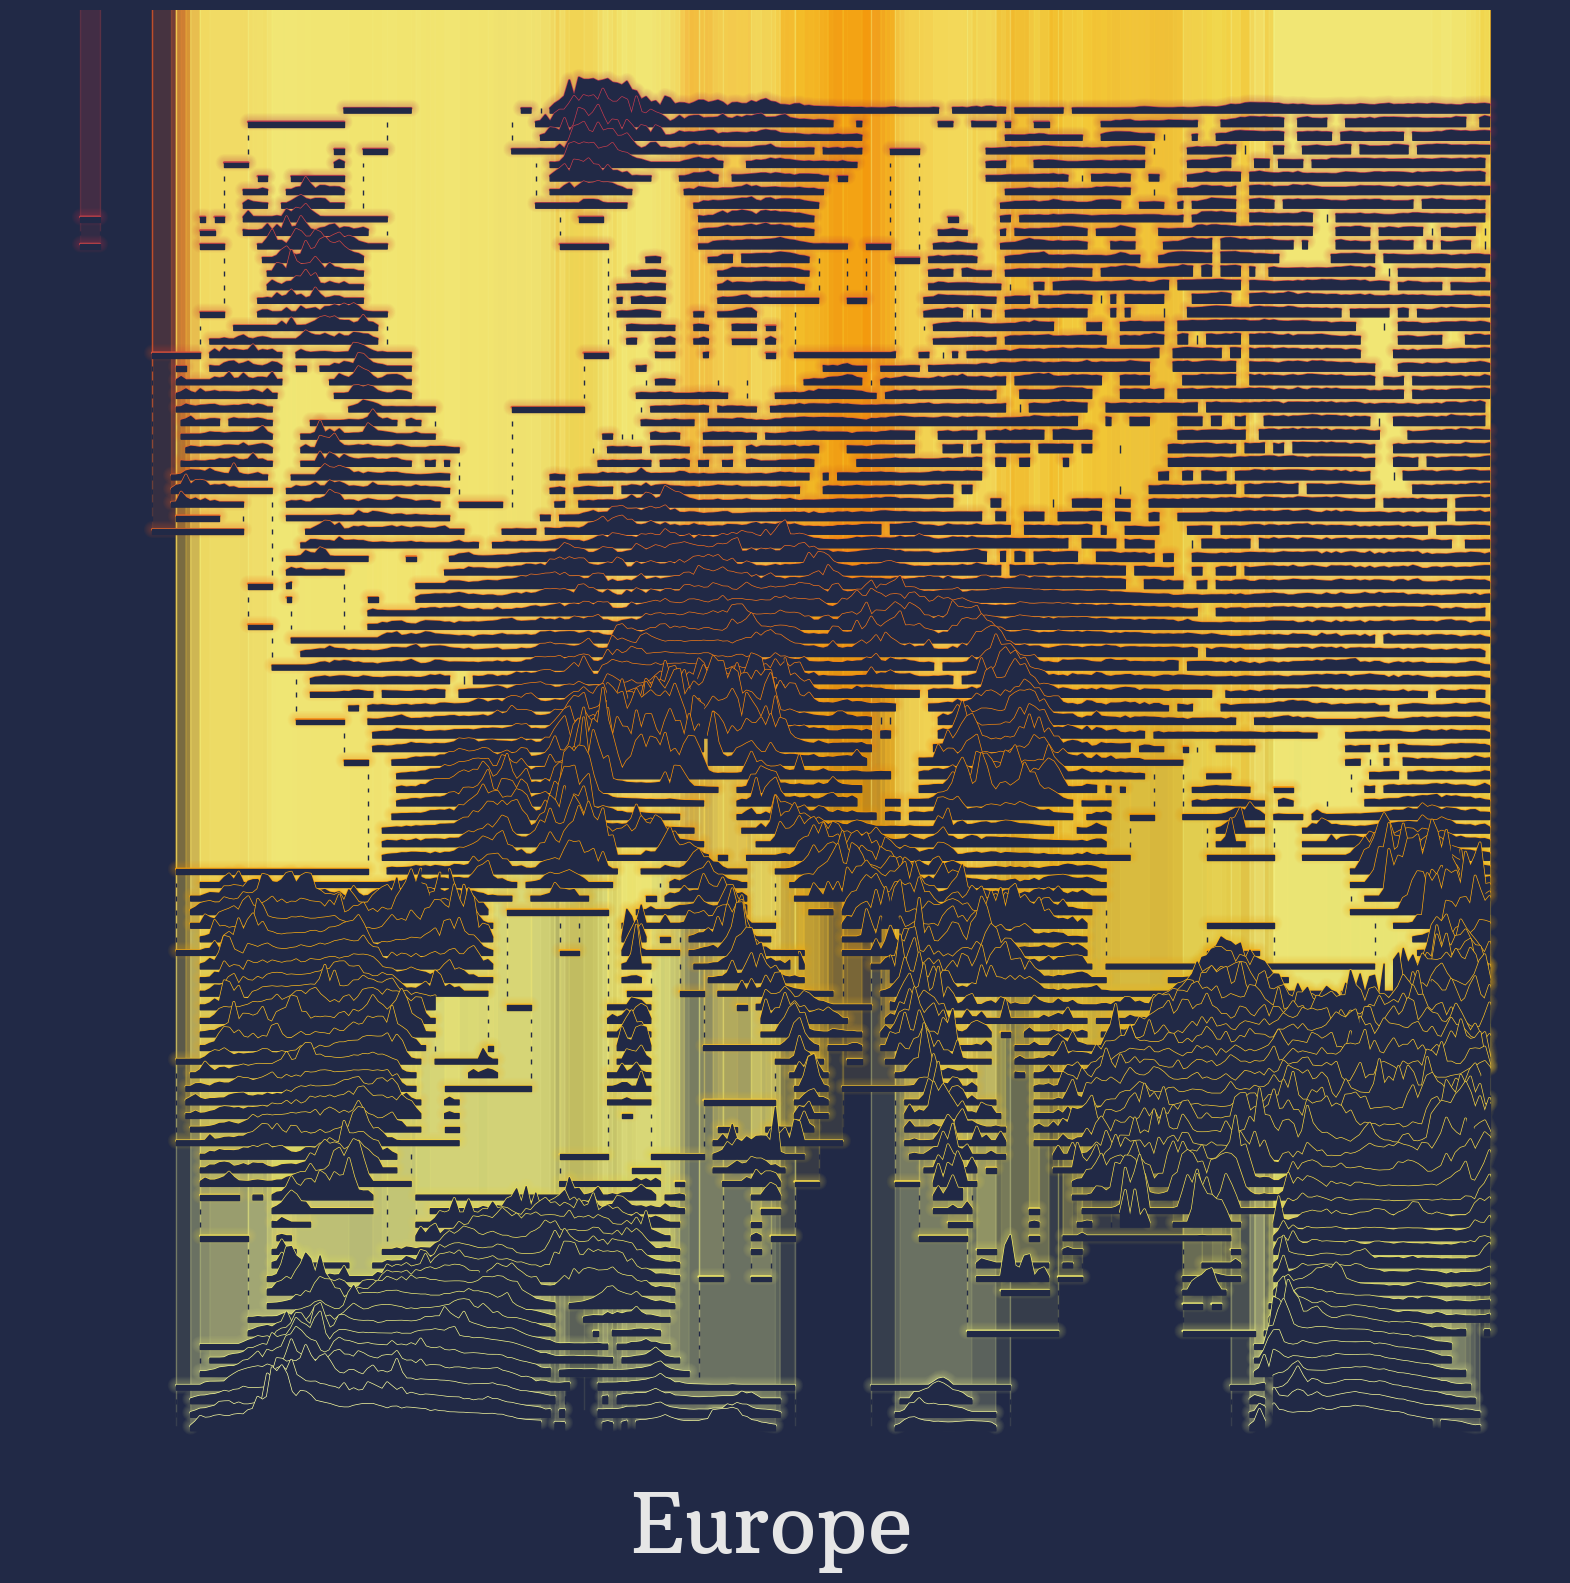

In [17]:
import matplotlib.pyplot as plt
from  ridge_map import FontManager, RidgeMap
import ridge_map as rm
import mplcyberpunk
import matplotlib.font_manager as fm

plt.style.use("cyberpunk")
plt.rcParams["figure.figsize"] = (16,9)

fm = FontManager('https://github.com/google/fonts/blob/main/ofl/arbutusslab/ArbutusSlab-Regular.ttf?raw=true')

r = RidgeMap(bbox=(-15, 32, 45,90), font=fm.prop) #creating a map

values =r.get_elevation_data(num_lines=200) #getting elevation data
values = r.preprocess(values=values, #setting hypoparameters
   water_ntile=70,
   vertical_ratio=40,
   lake_flatness=3)

r.plot_map(values, label="Europe", label_x=0.4,label_y=-0.05, label_size=60, line_color=plt.get_cmap('inferno'), background_color="#212946")
mplcyberpunk.add_glow_effects() #adding glowing